In [ ]:
# Q1. What is Gradient Boosting Regression?

Gradient Boosting Regression is a powerful and widely used machine learning technique that falls under the category of ensemble methods. It builds on the principle of boosting, which involves combining multiple weak learners, typically decision trees, to form a strong predictive model. In Gradient Boosting Regression, these learners are added sequentially to correct the errors made by previous learners. The method is called "gradient boosting" because it uses a gradient descent algorithm to minimize the loss when adding new models.

### Key Features of Gradient Boosting Regression:

1. **Sequential Tree Building**:
   - Unlike bagging methods (like Random Forests), which build trees in parallel, gradient boosting builds one tree at a time. Each new tree is built to correct the residual errors made by the previous trees.

2. **Gradient Descent Optimization**:
   - At each step, gradient boosting fits new models to provide a more accurate estimate of the response variable. The method uses a gradient descent algorithm to minimize the loss function (like Mean Squared Error for regression).

3. **Flexibility in Loss Functions**:
   - Gradient boosting can be used with a variety of loss functions, making it adaptable to different regression problems. This includes both linear and non-linear problems.

4. **Regularization**:
   - It includes several parameters for regularization, such as the number of trees, tree depth, and learning rate, which help prevent overfitting.

### How Gradient Boosting Regression Works:

1. **Initialization**: 
   - The algorithm starts with an initial estimate for the regression model. This could be as simple as the mean of the target values.

2. **Iterative Improvement**:
   - At each step, a decision tree is added that predicts the residuals or errors of the whole ensemble so far.
   - After adding a tree, the model's predictions are updated to reflect the contribution of the new tree.

3. **Gradient Descent Step**:
   - The gradient descent aspect comes into play in how the algorithm decides on the direction that will reduce the loss (or error). It computes the negative gradient of the loss function and uses this to update the model.

4. **Regularization Through Learning Rate and Tree Constraints**:
   - The learning rate scales the contribution of each tree. A smaller learning rate requires more trees in the model but can lead to better generalization.
   - Constraints on tree complexity (like depth or number of leaves) also act as regularization methods.

5. **Stopping Criterion**:
   - The algorithm stops adding trees when a maximum number of trees is reached, or if adding new trees ceases to improve the model significantly.

### Applications and Considerations:

- **Applications**: Gradient Boosting Regression is used in a wide array of fields, from the prediction of housing prices to financial modeling.
- **Overfitting**: While powerful, gradient boosting can overfit if not properly regularized and tuned.
- **Computationally Intensive**: It can be computationally more expensive than other methods, especially with large datasets and a large number of trees.

Popular implementations of Gradient Boosting Regression include libraries like `XGBoost`, `LightGBM`, and `CatBoost`, which offer efficient and scalable versions of the algorithm with enhancements for performance and usability.

In [ ]:
# Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
# simple regression problem as an example and train the model on a small dataset. Evaluate the model's
# performance using metrics such as mean squared error and R-squared.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,make_scorer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
X,y=make_regression(n_samples=100,n_features=1,noise=10,random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
class SimpleGradientBoostingRegressor:
    def __init__(self,n_estimators,learning_rate=0.1,max_depth=3):
        self.n_estimators=n_estimators
        self.learning_rate=learning_rate
        self.max_depth=max_depth
        self.trees=[]
        
    def fit(self,X,y):
        # Initialize the model with the mean of the target
        self.initial_model=np.mean(y)
        F=np.full(y.shape,self.initial_model)
        
        # Iteratively add trees to the model
        for _ in range(self.n_estimators):
             # Calculate the pseudo-residuals
            residuals=y-F
            # Fit a decision tree to the residuals
            tree=DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X,residuals)
            
            # Update the model with this tree's predictions
            F+=self.learning_rate*tree.predict(X)
            
            # Store the tree
            self.trees.append(tree)
            
    
    def predict(self,X):
        # Start with the initial model
        F=np.full(X.shape[0],self.initial_model)
        
        # Add the predictions of each tree
        for tree in self.trees:
            F+= self.learning_rate* tree.predict(X)
            
        return F
        

In [ ]:
# Create and train the model
model = SimpleGradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3)
model.fit(X_train,y_train)

# Make predictions
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_train,y_pred_train)


In [ ]:
mse_train, mse_test, r2_train, r2_test

In [ ]:
# Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
# optimise the performance of the model. Use grid search or random search to find the best
# hyperparameters

In [ ]:
# Define the ranges for hyperparameters
# Generate a simple regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

Param_grid={
'learning_rate':[0.01,0.05,0.1,0.2],
'n_estimators':[10,50,100,150],
'max_depth':[1,2,3,4]
}

gbm=GradientBoostingRegressor(random_state=42)


# Define the grid search with cross-validation
grid_search= GridSearchCV(estimator=gbm,param_grid=Param_grid,cv=5,n_jobs=-1,scoring=make_scorer(mean_squared_error))

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [1]:
# Q4. What is a weak learner in Gradient Boosting?


In Gradient Boosting, a "weak learner" is a simple model that is only slightly better than random guessing. The term "weak" contrasts with a "strong learner," which is a highly accurate and complex model. In the context of Gradient Boosting, these weak learners are combined in a way that the resulting ensemble, or the combined model, is much stronger and more accurate than any of the individual weak models.

### Characteristics of Weak Learners in Gradient Boosting:

1. **Simple Structure**: Typically, weak learners are simple decision trees, often just one level deep (referred to as "decision stumps"). However, they can be more than one level deep depending on the implementation and settings.

2. **Limited Complexity**: These learners have limited predictive power on their own. They are intentionally kept simple to ensure that the overall model doesn't overfit the training data too quickly.

3. **Focus on Residuals**: In Gradient Boosting, each weak learner is trained to predict the residuals or errors of the previous learners. By focusing on the mistakes of the previous models, the ensemble gradually improves.

4. **Sequential Training**: Weak learners are added one at a time, and each learner is trained taking into account the ensemble of the already trained learners. This sequential process is key to how Gradient Boosting builds its model.

5. **Combined for Strong Learning**: The final model in Gradient Boosting is a weighted sum of these weak learners. The ensemble can model complex relationships and patterns in the data that a single weak learner cannot.

### Role in Gradient Boosting:

The use of weak learners is central to the boosting strategy. By starting with simple models and gradually increasing complexity, Gradient Boosting can effectively reduce both bias and variance. Each successive weak learner corrects the errors of the combined set of previous learners, leading to a powerful and robust final model.

This approach contrasts with methods like bagging (used in Random Forests), where each model in the ensemble is typically a strong learner, and they are combined to reduce variance, not bias. In Gradient Boosting, the focus is on reducing bias while controlling for variance through the simplicity of individual models and other regularization techniques.

In [2]:
# Q5. What is the intuition behind the Gradient Boosting algorithm?

The intuition behind the Gradient Boosting algorithm revolves around the concept of boosting, which involves sequentially improving an ensemble model by focusing on the weaknesses of the previous models. Here's a step-by-step breakdown to understand the intuition:

### 1. Start with a Weak Model:
   - **Initial Prediction**: Begin with a simple model, often just a constant value like the mean or median of the target variable. This model is usually too simplistic to capture the complexity of the data.

### 2. Calculate Residuals:
   - **Focus on Mistakes**: After the initial prediction, calculate the residuals (or errors) for each data point, which represent how far off the model's predictions are from the actual values.

### 3. Learn from Mistakes:
   - **Train on Residuals**: Train a weak learner (like a shallow decision tree) to predict these residuals, not the actual target variable. Essentially, this learner is trying to correct the mistakes of the current ensemble.

### 4. Update the Model:
   - **Additive Model**: Update the model by adding this new learner's predictions to the existing predictions. This step is where gradient boosting uses a gradient descent-like approach, adjusting the model in the direction that reduces the overall error.

### 5. Sequential Improvement:
   - **Iterative Process**: Repeat steps 2-4, adding new learners that focus on the updated residuals (i.e., the mistakes that the current ensemble model is making). Each new learner is trained to improve upon the residuals left by the current ensemble.

### 6. Controlled Complexity:
   - **Regularization**: Use techniques like limiting the depth of trees, shrinking the contribution of each tree (learning rate), and stopping the addition of trees after a certain number to prevent overfitting. This way, the model's complexity is controlled.

### 7. Ensemble Predictions:
   - **Weighted Sum**: The final model is a weighted sum of the predictions of all the individual weak learners. It's more complex and nuanced than any individual learner.

### Intuitive Summary:

- **Correcting Errors**: Think of each step in gradient boosting as trying to correct the mistakes of the ensemble so far.
- **Learning Rate**: This is akin to taking small steps in the right direction. A smaller learning rate means taking smaller steps, which can lead to a more accurate, though slower, learning process.
- **Gradient Descent**: The 'gradient' part comes from the use of gradient descent to minimize the loss (error). The algorithm calculates the gradient of the loss function and moves in the direction that reduces the loss.
- **Sequential and Cumulative Learning**: Each new learner adds a piece of knowledge to the puzzle, refining the model's understanding of the data.

The power of gradient boosting lies in its ability to sequentially focus on the difficult parts of the data by constantly refining its predictions. This makes it a very effective and widely used machine learning technique, especially for structured data.

In [3]:
# Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

The Gradient Boosting algorithm builds an ensemble of weak learners (typically decision trees) through a sequential and iterative process. Each weak learner in the ensemble is trained to correct the errors made by the previous learners. The process of building this ensemble can be broken down into several key steps:

### 1. Initial Model:
   - **Start Simple**: The algorithm begins with a very simple model. This could be a decision stump (a decision tree with only one split) or sometimes a constant value like the mean of the target variable.

### 2. Calculate Residuals:
   - **Identify Errors**: After making initial predictions, the algorithm calculates the residuals (or errors) for each data point. The residual for each point is the difference between the actual value and the predicted value from the current ensemble.

### 3. Train a Weak Learner on Residuals:
   - **Correcting Mistakes**: A new weak learner (e.g., a shallow decision tree) is trained, but not to predict the actual target values. Instead, it's trained to predict the residuals from the previous step.
   - **Focus on Harder Cases**: By training on residuals, each new learner focuses on the data points that are harder to predict, effectively learning from the mistakes of the ensemble so far.

### 4. Update the Model:
   - **Ensemble Growth**: The predictions from the new weak learner are combined with the existing predictions. This is typically done by adding a fraction of the new learner's predictions to the existing predictions, controlled by the learning rate.

### 5. Iterative Process:
   - **Sequential Addition**: Steps 2-4 are repeated for a specified number of iterations, or until the improvement becomes negligible. With each iteration, the residuals get smaller, and the model becomes more accurate.

### 6. Learning Rate:
   - **Controlling the Step Size**: The learning rate is a hyperparameter that controls how strongly each weak learner's corrections are weighted. A smaller learning rate means that each tree makes a smaller adjustment, which can lead to a more robust model but requires more trees for convergence.

### 7. Regularization:
   - **Preventing Overfitting**: Techniques like limiting the maximum depth of trees, pruning trees, and subsampling the training data are used to prevent overfitting. 

### Ensemble of Weak Learners:
   - **Combined Predictions**: The final model is an ensemble where each weak learner contributes to the final prediction. The ensemble's prediction is the sum of the initial model's prediction and the weighted corrections from each of the weak learners.

### Key Concepts:
- **Additive Modeling**: Gradient Boosting builds the ensemble in an additive manner. Each new model incrementally improves the ensemble.
- **Focus on Errors**: Training subsequent models on residuals ensures that the ensemble pays more attention to the instances that are harder to predict.
- **Sequential Training**: Unlike bagging methods (like in Random Forests), where models are trained independently, in gradient boosting, each model is trained based on the ensemble's current state.

The ability of Gradient Boosting to focus sequentially on difficult parts of the data makes it a powerful tool for a wide range of predictive modeling tasks.

Constructing the mathematical intuition behind the Gradient Boosting algorithm involves understanding several key concepts and steps that define how the algorithm iteratively improves its model. Here's a breakdown of these steps:

### 1. Loss Function:

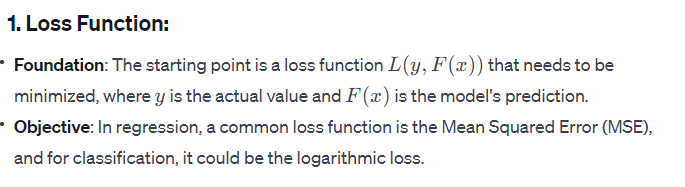
### 2. Initial Model:

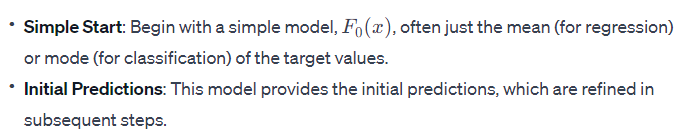
### 3. Iterative Process:

- **Sequential Improvement**: The model is improved in stages, each stage adding a new weak learner.

### 4. Computing the Negative Gradient:

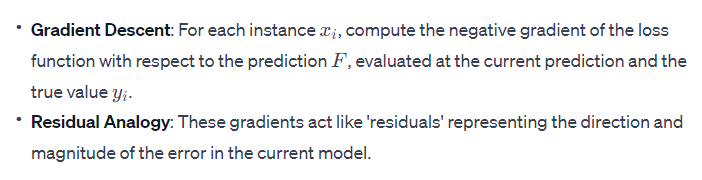

### 5. Training Weak Learners:

- **Focusing on Errors**: Train a weak learner (e.g., a shallow decision tree) to predict these negative gradients.
- **Local Corrections**: Each weak learner makes local corrections based on where the current model predictions are lacking.

### 6. Update the Model:

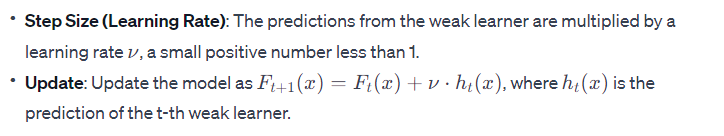

### 7. Loss Reduction:

- **Effect of Addition**: Each new weak learner is chosen to minimize the loss function \( L \), leading to a decrease in the overall loss with each iteration.

### 8. Regularization:

- **Control Overfitting**: Techniques such as limiting the depth of the decision trees, shrinking the updates (learning rate), and subsampling the data are used to prevent overfitting.

### 9. Ensemble Creation:

- **Final Model**: The final model \( F(x) \) is the sum of the initial model and the contributions from all the weak learners.

### Mathematical Summary:

- Gradient Boosting constructs a model in a forward stage-wise manner by fitting weak learners to the negative gradients of the loss function, akin to performing gradient descent in function space.
- The learning rate acts as a step size in traditional gradient descent, controlling how fast the model learns.
- Regularization techniques ensure the model's generalizability to unseen data.

This mathematical framework allows Gradient Boosting to be a flexible and powerful algorithm capable of handling a wide range of regression and classification problems.